# ROC-curve for logistic regression model

# Imports

In [1]:
'''
Credit to GitHub user Jaimin09
Link: https://github.com/Jaimin09/Coding-Lane-Assets/tree/main/Logistic%20Regression%20in%20Python%20from%20Scratch
Last accessed: 28/10/2021
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import portablelogresmodel as model
import scipy
from scipy import stats

# ! Get dataset
filepath = 'dec_sep_MPHWAE.csv'
df = pd.read_csv(filepath)
df= df.reset_index()

dec_path = 'dec_MPHWA.csv'
dec_df = pd.read_csv(dec_path)
dec_df = dec_df.reset_index()

# Variables for model

In [2]:
X_list = ['ID', 
        'Height_div_avg', 
        'Weight_div_avg', 
        'Age_div_avg'
        ]

#'PreviousMedals', 

Y_list = ['ID', 'MedalEarned']

# Run the model

In [3]:
rng = np.random.default_rng(1)
W_list, B_list = model.RunMore(df, X_list, Y_list, rng, times= 50, iterations= 5000, l_rate= 0.02)


40 runs left.
30 runs left.
20 runs left.
10 runs left.
0 runs left.


# F-test

## Classify fucntion

In [4]:
# Classify til f_test 
def Classify_f(df, W, B):
    
    # Få data til model 
    X_dims = df[X_list] 
    Y_dims = df[Y_list]
    X_dims, Y_dims = model.Reshape(X_dims, Y_dims)
    
    # Få modelgæt
    lin_func = np.dot(W.T, X_dims) + B # Linear function
    sf = model.Sigmoid(lin_func) # Sigmoid function
    
    return sf

# Få liste af modelgæt, når w er udændret
sig_0 = Classify_f(df, W_list[0], B_list[0])
print(sig_0)
sig_0_sum = np.sum(sig_0)
print(sig_0_sum)

# Få liste af modelgæt, når w_i = 0 er udændret

# Lav en kopi af modelvægte, og sæt den første til 0
W1_list = copy.deepcopy(W_list)
W1_list[0][0] = 0 

sig_1 = Classify_f(df, W1_list[0], B_list[0])
print(sig_1)
sig_1_sum = np.sum(sig_1)
print(sig_1_sum)



[[0.53592332 0.70226123 0.62090655 ... 0.32798235 0.64142721 0.46575448]]
2923.9748622227125
[[0.55172058 0.6596669  0.57849647 ... 0.35088628 0.58958148 0.47333014]]
2919.936380409222


ShapiroResult(statistic=0.9996129274368286, pvalue=0.27036985754966736)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


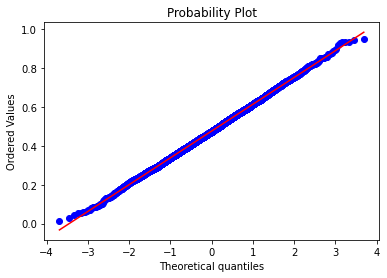

In [5]:
x = scipy.stats.shapiro(sig_0)
print(x)
df_bonk = pd.DataFrame(sig_0.T, columns = ['sig_0'])
q = scipy.stats.probplot(df_bonk['sig_0'], dist = 'norm', plot = plt)
plt.show(q)

In [8]:
#define F-test function
def f_test(x, y):
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return p

#perform F-test
p_val = f_test(sig_0, sig_1)
print(p_val * 100, '%')

1.1102230246251565e-14 %
